In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

In [5]:
data_filepath = "https://raw.githubusercontent.com/aoguedao/gmu_casbbi_data_science/main/data/vact.csv"
data = pd.read_csv(data_filepath).iloc[:, 5:18]
data.head()

,Average Yrsof Schooling,Good Air Quality Index,High Employment Access,High Health Care Access,Income Equality GINI,Job Participation High Labor Force,Less Deprived Area Townsend Index,LILA Food Access,More Affordability Index,More Walkability Environment Index,Pop WeightedDensity,Racial Dissimilarity Index,Stables Pop Churning
0,0.734770,0.670121,0.123707,0.464408,0.485695,0.823,0.325624,0.066698,0.576577,0.328239,0.150295,0.915115,0.756997
1,0.724919,0.616082,0.141960,0.465968,0.456410,0.796,0.298161,0.066698,0.510511,0.168022,0.298571,0.831974,0.756997
2,0.734893,0.643210,0.125980,0.444859,0.508232,0.764,0.292209,0.066698,0.521522,0.224218,0.148553,0.760879,0.606870
3,0.747167,0.580366,0.134115,0.442811,0.512821,0.831,0.195270,0.066698,0.523524,0.266507,0.666856,0.748035,0.786260
4,0.802269,0.804316,0.088873,0.442811,0.430364,0.616,0.305863,0.066698,0.619620,0.283657,0.193837,0.913189,0.805344


In [ ]:
data.shape

(1886, 13)

In [10]:
X = data.loc[:, lambda df: [x for x in df.columns if x != "High Health Care Access"]]
X.head()

,Average Yrsof Schooling,Good Air Quality Index,High Employment Access,Income Equality GINI,Job Participation High Labor Force,Less Deprived Area Townsend Index,LILA Food Access,More Affordability Index,More Walkability Environment Index,Pop WeightedDensity,Racial Dissimilarity Index,Stables Pop Churning
0,0.734770,0.670121,0.123707,0.485695,0.823,0.325624,0.066698,0.576577,0.328239,0.150295,0.915115,0.756997
1,0.724919,0.616082,0.141960,0.456410,0.796,0.298161,0.066698,0.510511,0.168022,0.298571,0.831974,0.756997
2,0.734893,0.643210,0.125980,0.508232,0.764,0.292209,0.066698,0.521522,0.224218,0.148553,0.760879,0.606870
3,0.747167,0.580366,0.134115,0.512821,0.831,0.195270,0.066698,0.523524,0.266507,0.666856,0.748035,0.786260
4,0.802269,0.804316,0.088873,0.430364,0.616,0.305863,0.066698,0.619620,0.283657,0.193837,0.913189,0.805344


In [9]:
y = data.loc[:, "High Health Care Access"]
y.head()

0    0.464408
1    0.465968
2    0.444859
3    0.442811
4    0.442811
Name: High Health Care Access, dtype: float64

### Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)
model.score(X, y)

0.8791597863355068

## Correlation Matrix

In [ ]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    cmap="vlag",
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .3}
)
plt.xticks(rotation=45, horizontalalignment="right")
plt.yticks(rotation=45, horizontalalignment="right")
plt.title("Correlation")
plt.tight_layout()
plt.show()
plt.close()

## PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()
pca.fit(X)

PCA()

In [14]:
pca.explained_variance_ratio_ 

array([0.27105847, 0.20001889, 0.18821967, 0.08165358, 0.06861952,
       0.04580897, 0.04041822, 0.0343365 , 0.03060862, 0.0162466 ,
       0.01501179, 0.00799918])

In [15]:
pca.explained_variance_

array([0.04091633, 0.03019289, 0.02841179, 0.01232562, 0.01035813,
       0.00691487, 0.00610114, 0.0051831 , 0.00462038, 0.00245243,
       0.00226603, 0.00120748])

In [16]:
pca.singular_values_

array([8.78221366, 7.54410999, 7.31821237, 4.82014507, 4.41871873,
       3.61033719, 3.39126001, 3.12572339, 2.95117085, 2.15007537,
       2.06675386, 1.508673  ])

/tmp/ipykernel_333/2434867488.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


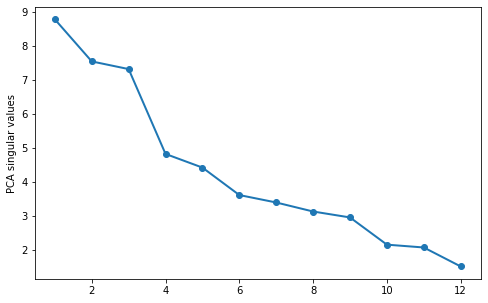

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(
    np.arange(1, pca.n_components_ + 1), pca.singular_values_, "-o", linewidth=2
)
ax.set_ylabel("PCA singular values")
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "-o", linewidth=2
)
ax.set_ylabel("PCA explained variance ratio")
fig.show()

## PCA N-Components

In [18]:
n = 4
pcan = PCA(n_components=n)
pcan.fit(X)


PCA(n_components=4)

In [19]:
pd.DataFrame(
    pcan.components_,
    columns=X.columns,
    index = [f"PC_{x}" for x in range(1, pcan.n_components_ + 1)]
)

,Average Yrsof Schooling,Good Air Quality Index,High Employment Access,Income Equality GINI,Job Participation High Labor Force,Less Deprived Area Townsend Index,LILA Food Access,More Affordability Index,More Walkability Environment Index,Pop WeightedDensity,Racial Dissimilarity Index,Stables Pop Churning
PC_1,-0.181693,-0.219464,-0.039155,-0.231765,-0.157506,-0.639811,0.111845,-0.508456,0.128682,0.065692,-0.171497,-0.328765
PC_2,0.203242,-0.225416,0.082194,0.058314,0.359953,-0.154934,-0.041128,0.147644,0.353368,0.192879,0.682294,-0.305067
PC_3,0.255027,-0.208051,0.095077,0.087153,0.369788,0.015857,-0.050728,0.269105,0.317956,0.149025,-0.709102,-0.192160
PC_4,0.118670,0.016249,-0.065843,-0.141248,-0.564399,0.391031,0.042693,0.166819,0.062151,0.023873,0.002238,-0.675149


### Regression after PCA

In [22]:
X_reduced = pcan.transform(X)
model2 = RandomForestRegressor()
model2.fit(X_reduced, y)
model2.score(X_reduced, y)

0.8633963031812751

In [23]:
model.score(X, y)

0.8791597863355068